<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.2.2: Boosting

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9429
    - **ROC AUC**  = 0.9333
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, laborious and iterative process. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Breast Cancer
The dataset you are going to be using for this laboratory is popularly known as the **Wisconsin Breast Cancer** dataset (`breast-cancer-wisconsin-data-old.csv`). The task related to it is Classification.

The dataset contains a total number of _10_ features labelled in either **benign** or **malignant** classes. The features have _699_ instances out of which _16_ feature values are missing. The dataset only contains numeric values.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

In [ ]:
# The primary business objective is to improve the accuracy of predicting whether a tumor is benign or malignant.
This is crucial because accurate classification directly impacts patient care and treatment decisions.
Better predictive performance means fewer false positives and false negatives,
which can lead to improved patient outcomes and more efficient use of medical resources.

# Step 2: Find the Data
### Wisconsin Breast Cancer DataSet
- **Citation Request**

    This breast cancer databases was obtained from the **University of Wisconsin Hospitals**, **Madison** from **Dr. William H. Wolberg**. If you publish results when using this database, then please include this information in your acknowledgements.

- **Title**

    Wisconsin Breast Cancer Database (January 8, 1991)

- **Sources**
    - **Creator**
            Dr. William H. Wolberg (physician)
            University of Wisconsin Hospitals
            Madison, Wisconsin
            USA
    - **Donor**
            Olvi Mangasarian (mangasarian@cs.wisc.edu)
            Received by David W. Aha (aha@cs.jhu.edu)
    - **Date**
            15 July 1992
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/about) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
df = pd.read_csv('breast-cancer-wisconsin-data-old.csv')


In [4]:
df.head

<bound method NDFrame.head of      Sample_number  Clump_Thickness  Cell_Size_Uniformity  \
0          1000025                5                     1   
1          1002945                5                     4   
2          1015425                3                     1   
3          1016277                6                     8   
4          1017023                4                     1   
..             ...              ...                   ...   
694         776715                3                     1   
695         841769                2                     1   
696         888820                5                    10   
697         897471                4                     8   
698         897471                4                     8   

     Cell_Shape_Uniformity  Marginal_Adhesion  Single_Epithelial_Cell_Size  \
0                        1                  1                            2   
1                        4                  5                            7   
2  

In [5]:
df.info

<bound method DataFrame.info of      Sample_number  Clump_Thickness  Cell_Size_Uniformity  \
0          1000025                5                     1   
1          1002945                5                     4   
2          1015425                3                     1   
3          1016277                6                     8   
4          1017023                4                     1   
..             ...              ...                   ...   
694         776715                3                     1   
695         841769                2                     1   
696         888820                5                    10   
697         897471                4                     8   
698         897471                4                     8   

     Cell_Shape_Uniformity  Marginal_Adhesion  Single_Epithelial_Cell_Size  \
0                        1                  1                            2   
1                        4                  5                            7   
2

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [6]:
df.describe

<bound method NDFrame.describe of      Sample_number  Clump_Thickness  Cell_Size_Uniformity  \
0          1000025                5                     1   
1          1002945                5                     4   
2          1015425                3                     1   
3          1016277                6                     8   
4          1017023                4                     1   
..             ...              ...                   ...   
694         776715                3                     1   
695         841769                2                     1   
696         888820                5                    10   
697         897471                4                     8   
698         897471                4                     8   

     Cell_Shape_Uniformity  Marginal_Adhesion  Single_Epithelial_Cell_Size  \
0                        1                  1                            2   
1                        4                  5                            7   

In [7]:
df.isnull().sum()

Sample_number                  0
Clump_Thickness                0
Cell_Size_Uniformity           0
Cell_Shape_Uniformity          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [8]:
df.drop(columns=['Sample_number'], inplace=True)

In [9]:
df.replace('?', np.nan, inplace=True)
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'])
df.head

<bound method NDFrame.head of      Clump_Thickness  Cell_Size_Uniformity  Cell_Shape_Uniformity  \
0                  5                     1                      1   
1                  5                     4                      4   
2                  3                     1                      1   
3                  6                     8                      8   
4                  4                     1                      1   
..               ...                   ...                    ...   
694                3                     1                      1   
695                2                     1                      1   
696                5                    10                     10   
697                4                     8                      6   
698                4                     8                      8   

     Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
0                    1                            2          1.0   
1    

In [12]:
#Drop rows with missing values
df.dropna(inplace=True)

In [13]:
# Change class labels from 2/4 to 0/1
df['Class'] = df['Class'].map({2: 0, 4: 1})

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Feature Engineer** (if useful or necessary)


Feature Distributions:


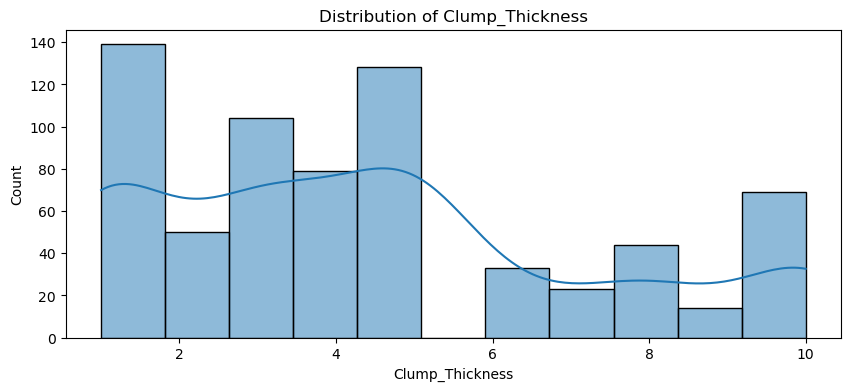

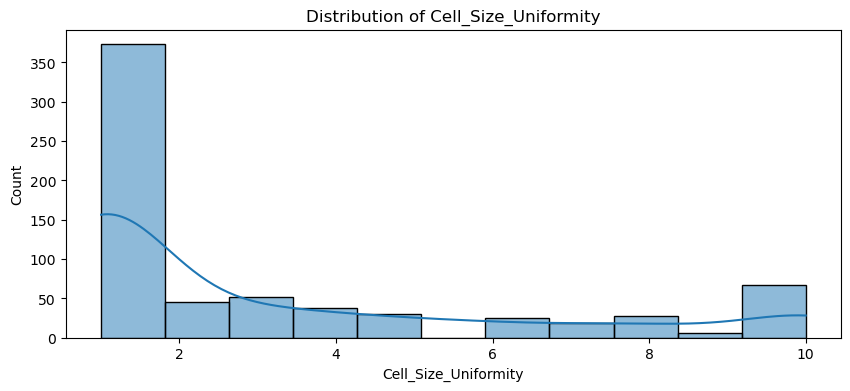

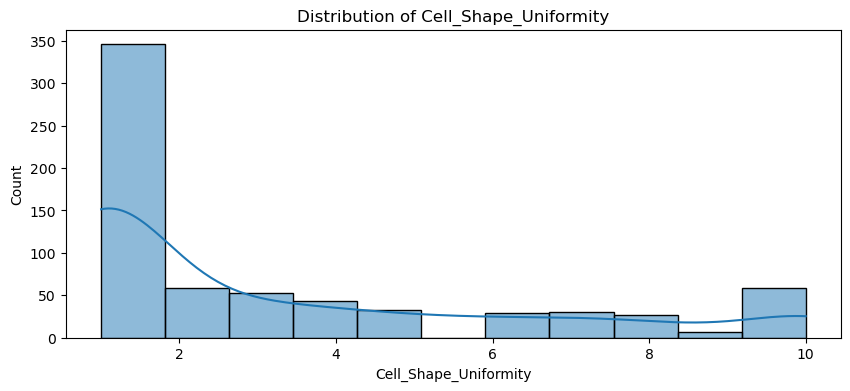

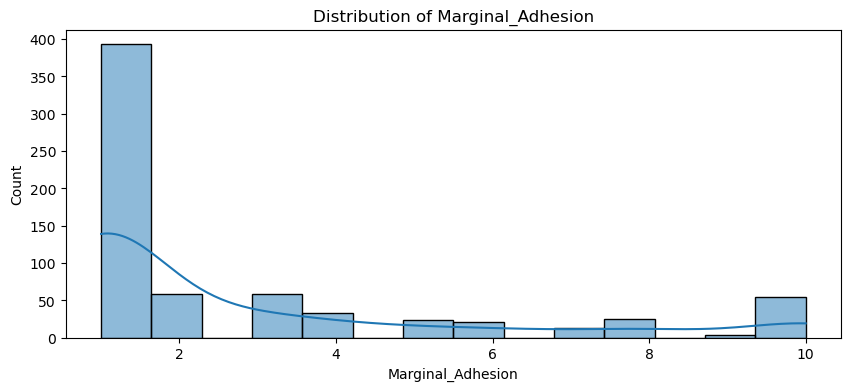

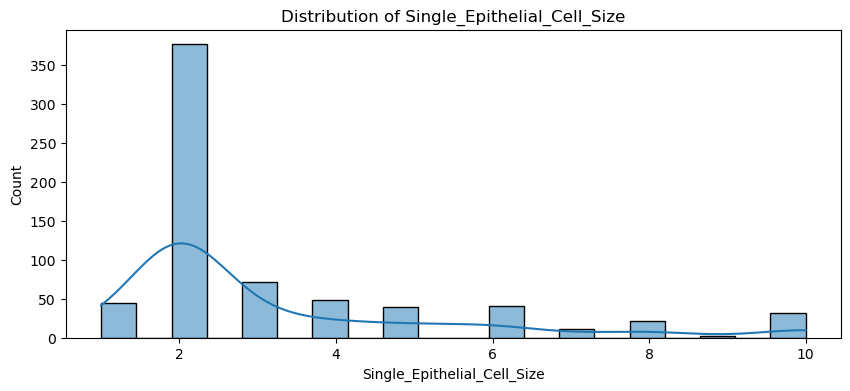

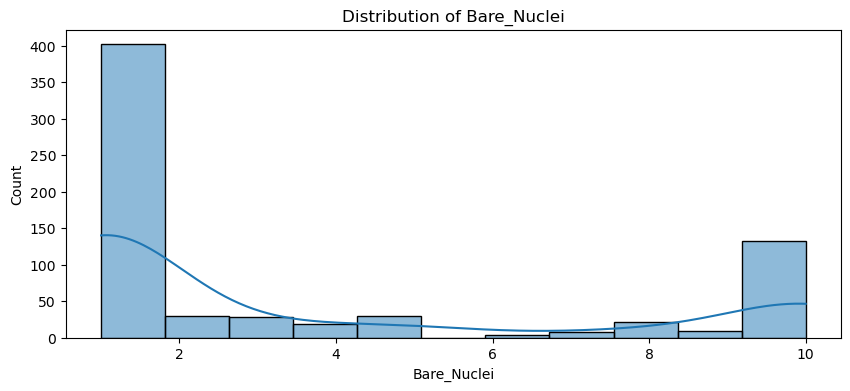

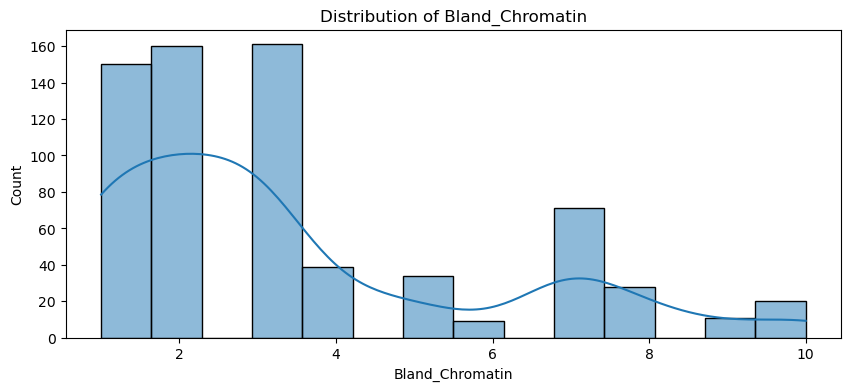

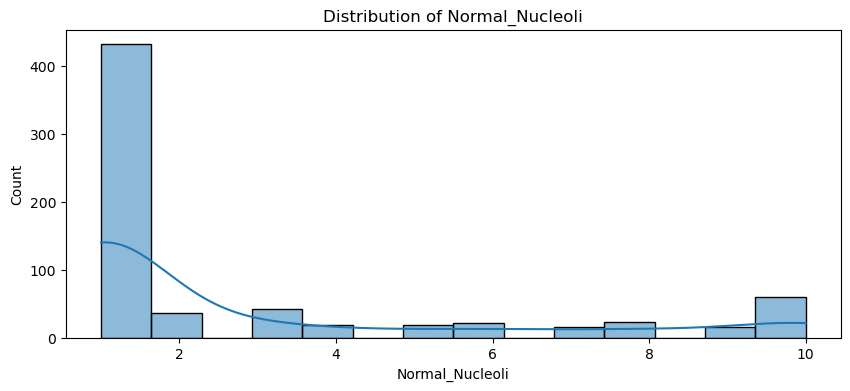

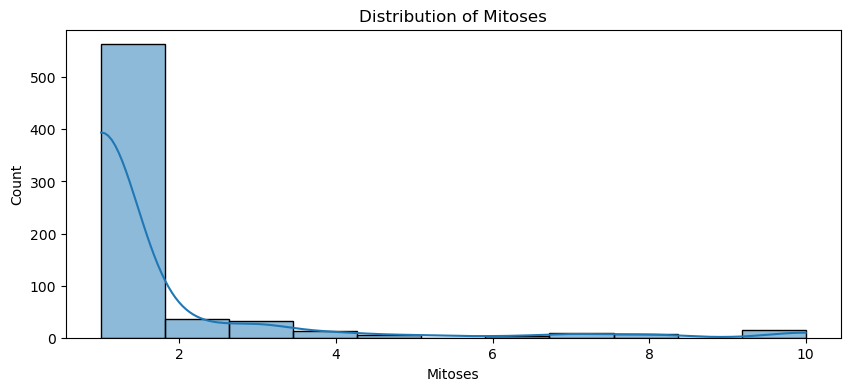

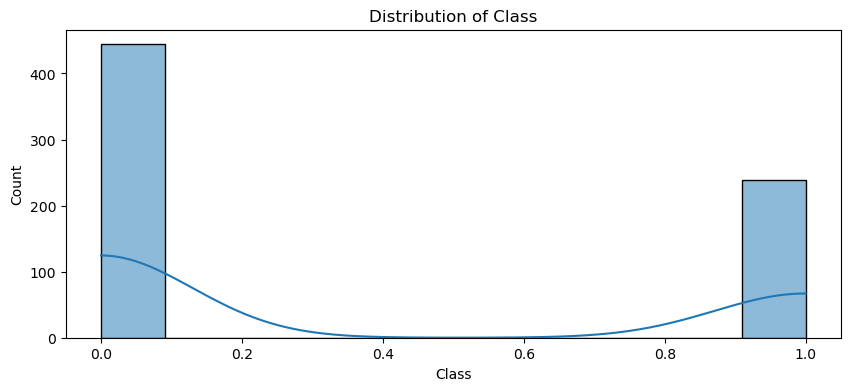

In [14]:
print("\nFeature Distributions:")
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(10, 4))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.show()


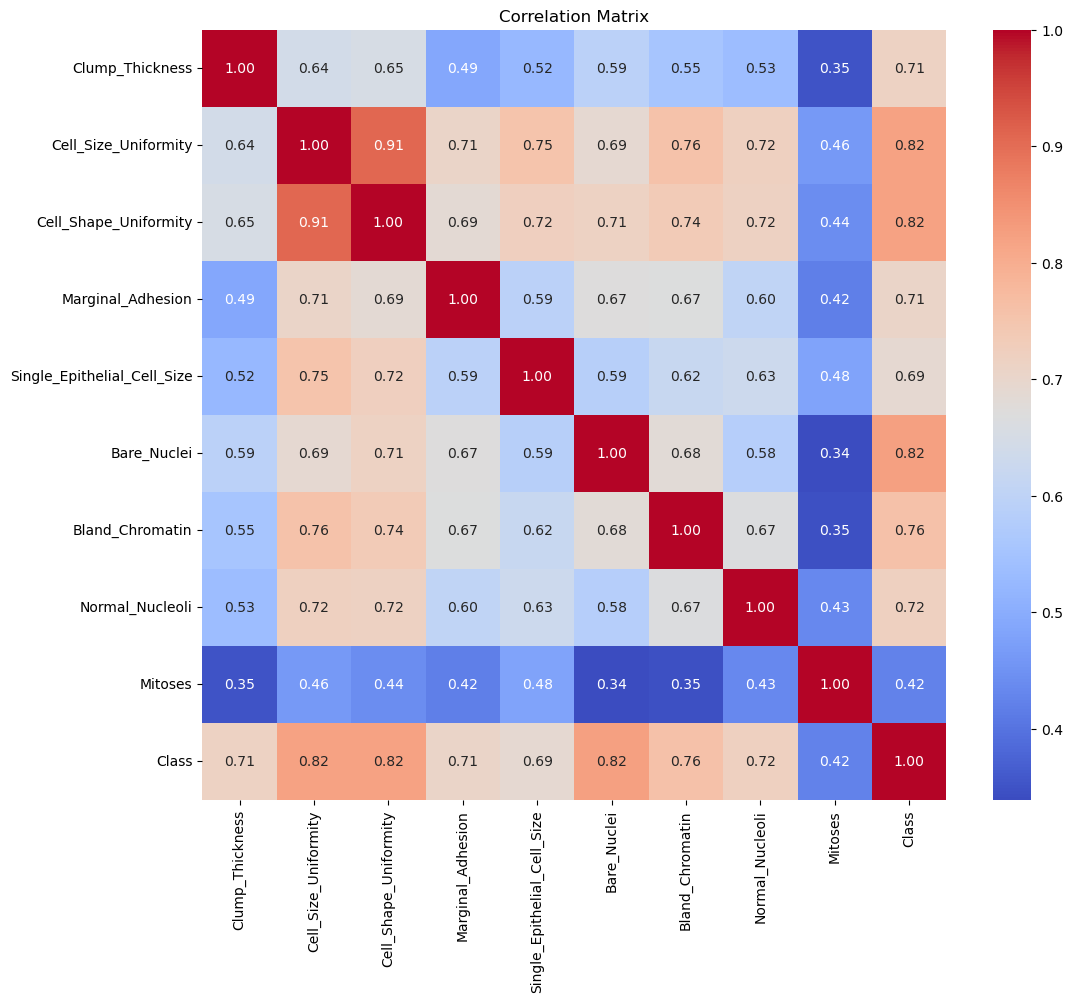

In [15]:
# Correlation Analysis
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

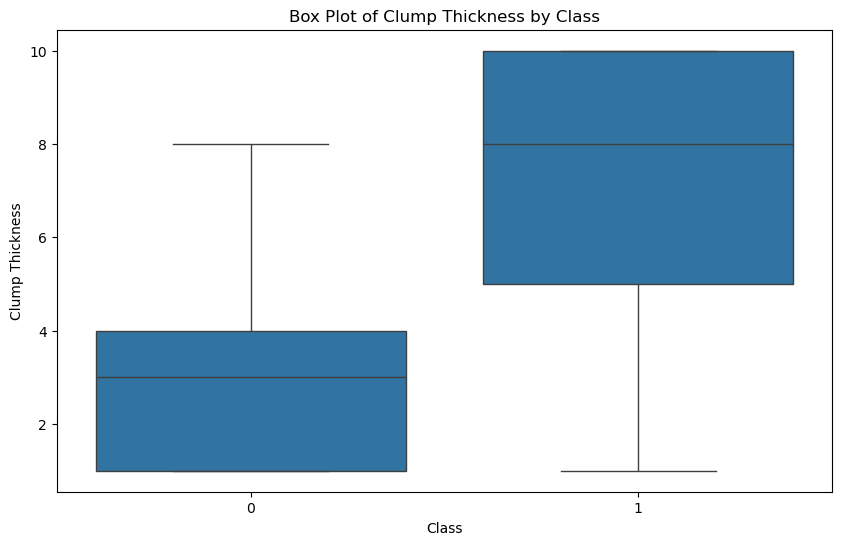

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Clump_Thickness', data=df)
plt.title('Box Plot of Clump Thickness by Class')
plt.xlabel('Class')
plt.ylabel('Clump Thickness')
plt.show()

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

In [43]:
#Features and target variable
X = df.drop(columns=['Class'])
y = df['Class']


In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when splitting

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [52]:
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],      # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 5, 7]                  # Maximum depth of the individual trees
}

In [53]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)


GradientBoostingClassifier()

# Step 9: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [54]:
y_train_pred = gb_model.predict(X_train)
y_train_proba = gb_model.predict_proba(X_train)[:, 1]  


In [55]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_proba)
print(f"Training Accuracy = {train_accuracy:.4f}")
print(f"Training ROC AUC = {train_roc_auc:.4f}")

Training Accuracy = 1.0000
Training ROC AUC = 1.0000


# Step 10: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [57]:
y_test_pred = gb_model.predict(X_test)
y_test_proba = gb_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC


In [61]:
test_accuracy = accuracy_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)
test_classification_report = classification_report(y_test, y_test)

In [62]:
print(f"Best Gradient Boosting Model Test Accuracy = {test_accuracy:.4f}")
print(f"Best Gradient Boosting Model Test ROC AUC = {test_roc_auc:.4f}")
print("Classification Report:\n", test_classification_report)

Best Gradient Boosting Model Test Accuracy = 0.9561
Best Gradient Boosting Model Test ROC AUC = 0.9939
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00        78

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [65]:
from sklearn.metrics import roc_curve, auc


In [66]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)


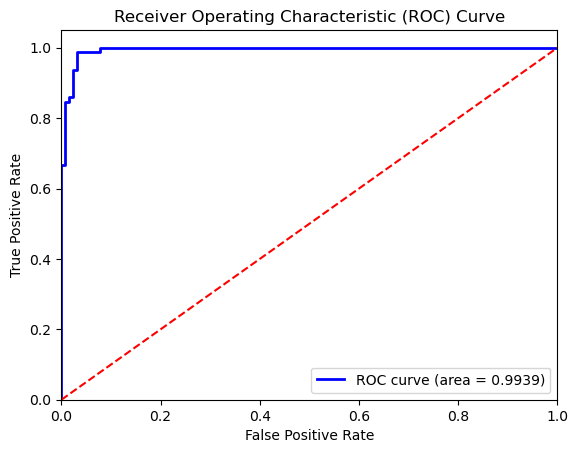

In [67]:
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [94]:
feature_names = [
    'Clump_Thickness', 'Cell_Size_Uniformity', 'Cell_Shape_Uniformity',
    'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
    'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses'
]

In [95]:
importances = gb_model.feature_importances_
indices = np.argsort(importances)[::-1]


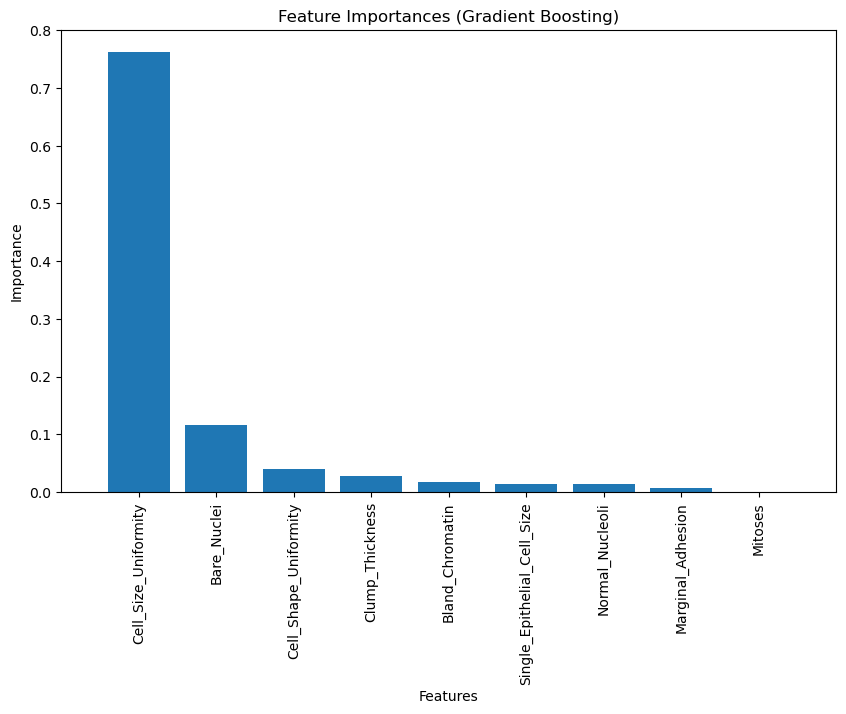

In [96]:
plt.figure(figsize=(10, 6))
plt.title('Feature Importances (Gradient Boosting)')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

In [ ]:
The features "Cell Size Uniformity" and "Bare Nuclei" are critical in the model for predicting tumor malignancy. 
Their significance in the model underscores their value in clinical settings for accurate diagnosis and effective treatment planning.
By emphasizing these features, the model enhances diagnostic accuracy, improves patient outcomes, and optimizes resource utilization in cancer care.





---



---



> > > > > > > > > © 2024 Institute of Data


---



---



